In [6]:
import numpy as np
import pandas as pd
import seaborn as sea 
import matplotlib.pyplot as plt

In [101]:
bca = pd.read_csv('/home/joao/Projetos/trabalho_fasam/geral/bca.csv')


bca = bca.rename(index = str, columns={"Year": "Ano", "Value":"Valor (Bilhões de Reais)"})

bca['Ano'] = bca['Ano'].apply(lambda x: x[0:4])



In [146]:
def periods(row):
    if row['Ano'] < '2003':
        row['Ano']
        return 'FHC'
    if row['Ano'] == '2003':
        return 'FHC/Lula'
    if row['Ano'] > '2003' and row['Ano'] < '2011':
        return 'Lula'
    if row['Ano'] == '2011':
        return 'Lula/Dilma'
    if row['Ano'] > '2011':
        return "Dilma"

In [147]:
bca['Periodos'] = bca.apply(lambda row: periods(row), axis = 1)

In [148]:
bca

,Ano,Valor (Bilhões de Reais),Periodos
0,1995,-18.384,FHC
1,1996,-23.502,FHC
2,1997,-30.453,FHC
3,1998,-33.416,FHC
4,1999,-25.334,FHC
5,2000,-24.224,FHC
6,2001,-23.215,FHC
7,2002,-7.637,FHC
8,2003,4.178,FHC/Lula
9,2004,11.679,Lula


In [149]:
tips = sea.load_dataset('tips')

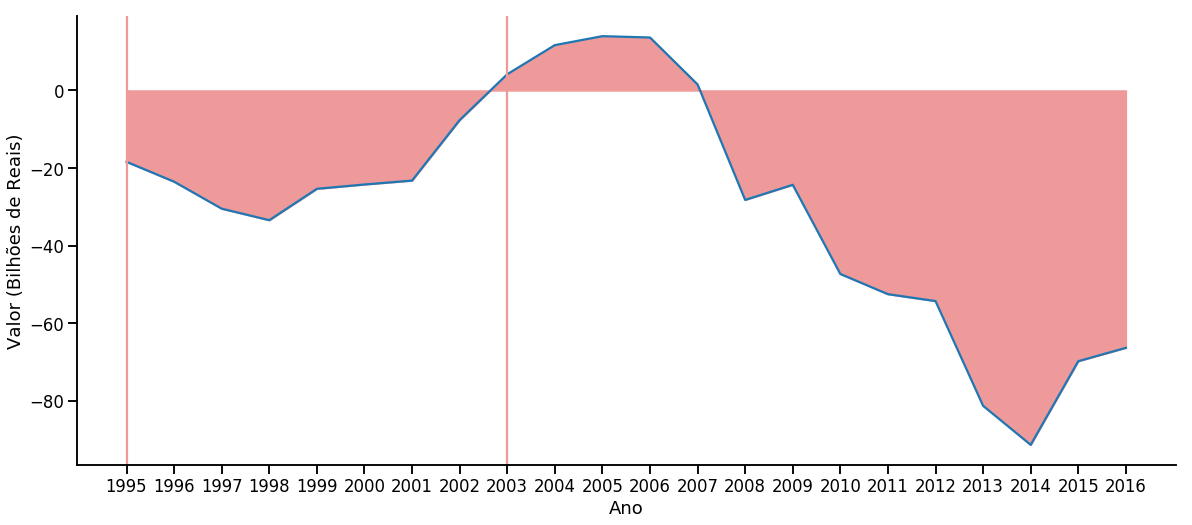

In [143]:
fig, ax = plt.subplots()
fig.set_size_inches(19.7, 8.27)
sea.lineplot(x='Ano', y ='Valor (Bilhões de Reais)', data = bca)
kde_x, kde_y = ax.lines[0].get_data()
p1 = plt.axvline(x='1995',color='#EF9A9A')
p2 = plt.axvline(x='2003',color='#EF9A9A')

ax.fill_between(kde_x, kde_y,interpolate=True, color='#EF9A9A')


sea.despine()

In [141]:
kde_x

array(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016'], dtype=object)